# MODELO PREDICTIVO DE LAS EMPRESAS AGROINDUSTRIALES DE ECUADOR

#### Forecasting Model for the Ecuadorian AgroFood Industry

In [1]:
# I want to extend a special thanks to my Co-worker Paula Suntaxi, she was crucial for this project.

### Importando las librerias estadísticas y matemáticas

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.stats as stats

### Importando datos 

#### Importing Data

In [3]:
df = pd.read_csv('ACCOUNTS.txt', sep='\t')  

# Source: Supercias Ecuador. | Public Economics Database by the Government of Ecuador, 2021.
# https://appscvsmovil.supercias.gob.ec/PortalInformacion/sector_societario.html
 

In [4]:
general = df.describe()
ab = df.loc[df.index,['PPC', 'ROE', 'ROA']]
ab1 = df.loc[df.index,['PPC']]  
ab2 = df.loc[df.index,['ROE']]
ab3 = df.loc[df.index,['ROA']]
correlacion1 = ab.corr()


#stats.f_oneway(ab1, ab2, ab3)



### Realización de prueba F 

##### F TEST

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Anova, recusos de libreria estadística "statsmodels" Python 3

model_1 = ols ('ab2 ~ ab1',
              data = ab).fit()
anova_result = sm.stats.anova_lm(model_1, typ=2)


In [6]:
anova_result

,sum_sq,df,F,PR(>F)
ab1,0.002538,1.0,8.589407,0.011696
Residual,0.003841,13.0,NaN,NaN


### Regresion lineal simple entre PPC con ROE y ROA

#### Average Collecting Period - ROE and ROA regression.

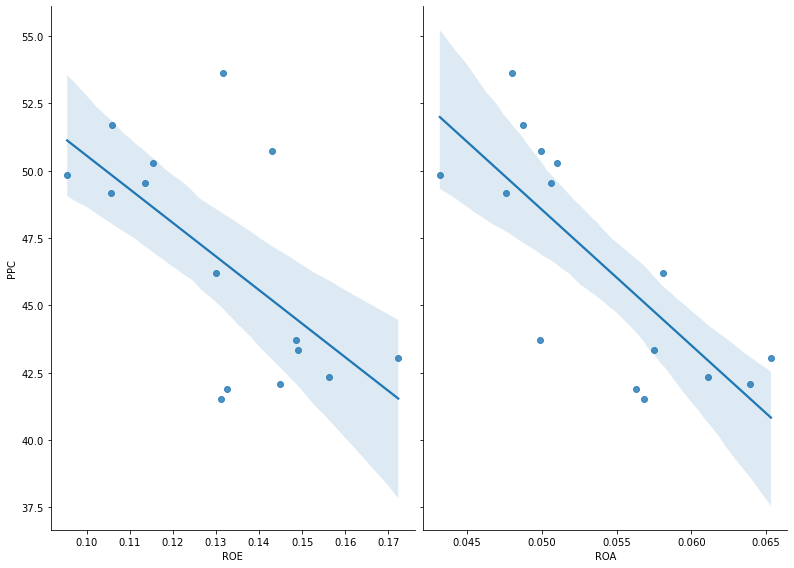

In [7]:
sns.pairplot(ab,x_vars=['ROE','ROA'], y_vars=['PPC'],
             height=8, aspect=.7, kind="reg")

### Regresion Multivariable y Gráfico Tridimencional

#### Multilinear Regression and Tridemensional Graph

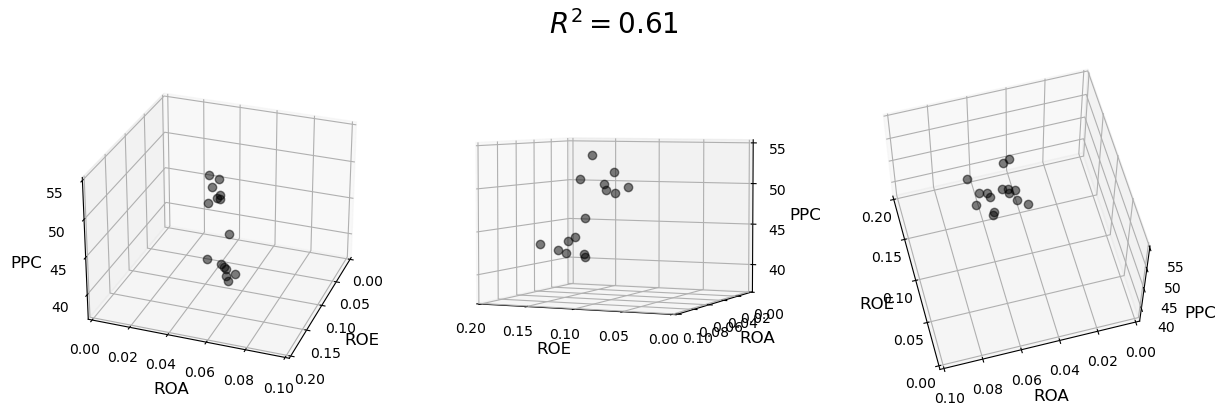

In [8]:

X = ab[['ROE', 'ROA']].values.reshape(-1,2)
Y = ab['PPC']

# Preparando el modelo de datos para vizualizaciones

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Entrenar el modelo para predecir

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

#Evaluar el modelo  

r2 = model.score(X, Y)

# Graficando en 3D

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('ROE', fontsize=12)
    ax.set_ylabel('ROA', fontsize=12,)
    ax.set_zlabel('PPC', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_xlim([0, 0.20])
    ax.set_ylim([0, 0.1])
    ax.set_zlim([37, 55])
    

ax1.view_init(elev=28, azim=20) #ESTE ANTES ERA 120
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

## REALIZACION DEL MODELO PREDICTIVO

### Simulación: ¿Cuántos días (PPC)  me toma alcanzar mi rentabilidad deseada (ROE Y ROA)?

#### In How many days should I collect all my accounts receivable to get my desired ROE and ROA?

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(ab[['ROE','ROA']],ab['PPC'])

LinearRegression()

In [10]:
roe_deseado = 0.13  #Introducir el ROE deseado
roa_deseado = 0.05  #Introducir el ROA deseado
forecasting = model.predict([[roe_deseado,roa_deseado]])   
forecasting

array([48.43555818])

##### Calculo de coeficientes angulares

In [11]:
model.coef_
roe_angular = -14.22839838
roa_angular = -467.89908607


##### Calculo de coeficiente interceptor o constante

In [12]:
constmult = model.intercept_
print(constmult)

73.68020427023893


#####  Prueba de fuego

In [13]:
forecasting_test = roe_angular*roe_deseado+roa_angular*roa_deseado+constmult 
forecasting_test   #El resultado de esta ecuación debe ser igual a forecasting

48.43555817733893

###  PREDECIR ROE SEGUN SUS PERIODOS DE COBRO

#### Predict ROE according to the average collecting period

In [14]:
from sklearn.linear_model import LinearRegression
ppc_1 = LinearRegression()
ppc_1.fit(ab[['PPC']],ab[['ROE']]) 

LinearRegression()

In [15]:
ppc_forecasting = 50  #Reemplazar "48" por sus PPC actuales para saber su rentabilidad proyectada
ppc_1.predict([[ppc_forecasting]]) 

array([[0.12088036]])

#### Cálculo Coeficiente Angual de Reg.

In [16]:
ppc_angular1 = ppc_1.coef_

print (ppc_angular1)

[[-0.00318762]]


#### Coeficiente de intercepcion o constante de la ecuacion

In [17]:
ppc_const1 = ppc_1.intercept_

print(ppc_const1)


[0.28026123]


#### Prueba de fuego

In [18]:
forecasintg_ppc_test = ppc_angular1*ppc_forecasting+ppc_const1  #Este resultado debe ser igual al de ppc_forecasting
print (forecasintg_ppc_test)   

[[0.12088036]]


### Programa

##### Predicting Program

In [19]:
linea = "____"
separador = (linea * 25 )
print(separador, "\n")
print("      ")                       
print(separador)

pregunta_ppc =  int(input("WELCOME TO THE AGROFOOD FORECASTING PROGRAM,  INSERT YOUR AVERAGE COLLECTING PERIOD (DAYS) \n"
"AND YOU WILL GET YOUR RETURN ON EQUITY (ROE) FOR THE NEXT YEAR: "))

respuesta_ppc = (ppc_1.predict([[pregunta_ppc]]))

if respuesta_ppc < 0 :
        print(separador, "\n")
        print("YOUR BUSINESS TAKES TOO MUCH TIME TO COLLECT THEIR ACCOUNTS REICIVABLE, YOUR R.O.E WILL DROP BY  {}% (ROE)  \n"
        "IN THE NEXT YEAR".format(respuesta_ppc*100))
        print(separador, "\n")
        
if respuesta_ppc > 0 :
        print(separador, "\n")
        print ("ACCORDING TO YOUR AVERAGE COLLECTING PERIOD, YOUR RETURN ON EQUITY WILL RAISE BY {}% THE NEXT YEAR".format(respuesta_ppc*100))
        print(separador, "\n")


____________________________________________________________________________________________________ 

      
____________________________________________________________________________________________________
WELCOME TO THE AGROFOOD FORECASTING PROGRAM,  INSERT YOUR AVERAGE COLLECTING PERIOD 
AND YOU WILL GET YOUR RETURN ON EQUITY (ROE) FOR THE NEXT YEAR: 45
____________________________________________________________________________________________________ 

ACCORDING TO YOUR AVERAGE COLLECTING PERIOD, YOUR RETURN ON EQUITY WILL RAISE BY [[13.68184499]]% THE NEXT YEAR
____________________________________________________________________________________________________ 



### PREDECIR ROA SEGUN SUS PERIODOS DE COBRO 

#### Predicting ROA according to your Average Collecting Period

In [20]:
from sklearn.linear_model import LinearRegression
ppc_2 = LinearRegression()
ppc_2.fit(ab[['PPC']],ab[['ROA']]) 

LinearRegression()

In [21]:
ppc2_forecasting = 50    # Input PPPC (45), output (Rentabilidad ROE y ROA

ppc_2.predict([[ppc2_forecasting]])  

array([[0.04978708]])

#### Calculo de coeficiente angular

In [22]:
ppc2_coef = ppc_2.coef_
print (ppc2_coef)

[[-0.0012007]]


#### Calculo de coeficiente interceptor o constante de la ecuacion

In [23]:
const_ppc2 = ppc_2.intercept_
print (const_ppc2)

[0.10982223]


#### Prueba de Fuego

In [24]:
ppc2_forecasting_test = ppc2_coef * ppc2_forecasting + const_ppc2  #Tiene que ser igual que ppc2_forecasting

print (ppc2_forecasting_test)

[[0.04978708]]


### Predecir ROA en programa

##### Predicting ROA program

In [25]:
linea = "____"
separador = (linea * 25 )
print(separador, "\n")
print("                                              ")                       
print(separador)

pregunta_ppc2 =  int(input("WELCOME TO THE AGROFOOD FORECASTING PROGRAM,  INSERT YOUR AVERAGE COLLECTING PERIOD (DAYS) \n"
"AND YOU WILL GET YOUR RETURN ON ASSETS (ROA) FOR THE NEXT YEAR: "))

respuesta_ppc2 = (ppc_2.predict([[pregunta_ppc2]]))

if respuesta_ppc2 < 0 :
        print(separador, "\n")
        print("YOUR BUSINESS TAKES TOO MUCH TIME TO COLLECT ITS ACCOUNTS REICIVABLE, YOUR R.O.A WILL DROP BY  {}% (ROA)  \n"
        "IN THE NEXT YEAR".format(respuesta_ppc2*100))
        print(separador, "\n")
        
if respuesta_ppc2 > 0 :
        print(separador, "\n")
        print ("ACCORDING TO YOUR AVERAGE COLLECTING PERIOD, YOUR RETURN ON ASSETS WILL RAISE BY {}% THE NEXT YEAR".format(respuesta_ppc2*100))
        print(separador, "\n")

____________________________________________________________________________________________________ 

                                              
____________________________________________________________________________________________________
WELCOME TO THE AGROFOOD FORECASTING PROGRAM,  INSERT YOUR AVERAGE COLLECTING PERIOD 
AND YOU WILL GET YOUR RETURN ON ASSETS (ROA) FOR THE NEXT YEAR: 77
____________________________________________________________________________________________________ 

ACCORDING TO YOUR AVERAGE COLLECTING PERIOD, YOUR RETURN ON ASSETS WILL RAISE BY [[1.73680951]]% THE NEXT YEAR
____________________________________________________________________________________________________ 



#### COSTO DE FINANCIAMIENTO DESDE 2006


 #### Financing cost (since 2006) 

In [26]:
import matplotlib.pyplot as plt


In [27]:
cartera = pd.read_csv ('FINANCING COST.txt' , sep = '\t')
cartera

# Grandes means Big Business, and pequenas means Small Business

,Year,Grandes,Medianas,Pequenas
0,2006,0.0223,0.0234,0.0204
1,2007,0.0216,0.0285,0.0218
2,2008,0.0191,0.0238,0.0142
3,2009,0.0148,0.0207,0.0122
4,2010,0.0182,0.0182,0.0149
5,2011,0.0164,0.0233,0.0142
6,2012,0.0153,0.0233,0.0210
7,2013,0.0152,0.0206,0.0100
8,2014,0.0175,0.0166,0.0101
9,2015,0.0181,0.0156,0.0104


<AxesSubplot:xlabel='Year'>

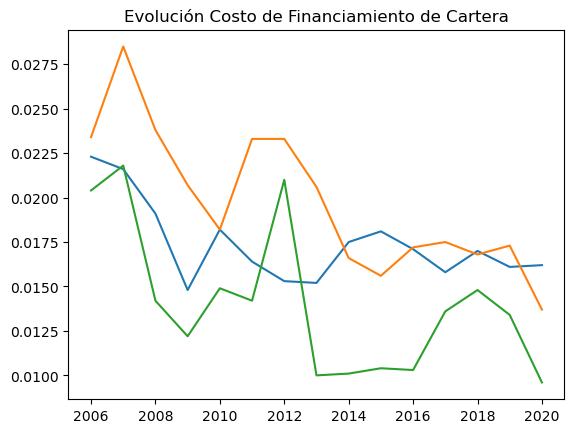

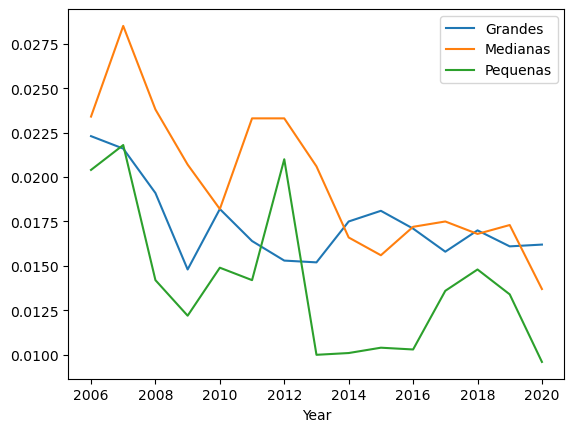

In [28]:
grandes = cartera.loc[cartera.index,['Grandes']]
medianas = cartera.loc[cartera.index,['Medianas']]
pequenas = cartera.loc[cartera.index,['Pequenas']]
anios =  cartera.loc[cartera.index,['Year']]

#x = anios
#y = grandes, medianas, pequenas

#graph = pd.DataFrame(x,y)

#graph.plot(kind = 'line')

#results1 = pd({'SAC': grandes, 'TD3': medianas, 'DDPG': pequenas})

#results1.plot()
#plt.legend(loc='lower right')
#plt.xlabel("Anios")
#plt.ylabel("Tipo de empr")
#plt.show()

plt.title('Evolución Costo de Financiamiento de Cartera')
plt.plot(cartera.Year, cartera.Grandes)
plt.plot(cartera.Year, cartera.Medianas)
plt.plot(cartera.Year, cartera.Pequenas)


cartera.plot.line(x='Year', y=['Grandes', 'Medianas','Pequenas'])
